## Dijkstra's Algorithm  
- 1st example needs more work
- 2nd example works

In [3]:
## Check that this is installed
# !pip install networkx

Population at node A: 0
Population at node B: 100
Population at node C: 200
Population at node D: 300
Population at node E: 400
Population at node F: 500
Population at node G: 600


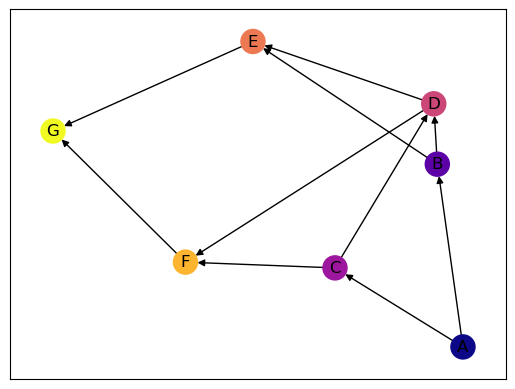

In [4]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra_with_population(graph, start_node):
    # Create a dictionary to store the population value for each node
    population = {node: float('-inf') for node in graph}
    population[start_node] = 0  # Set the population of the starting node to 0
    
    # Create a priority queue to store nodes and their associated costs
    queue = [(0, start_node)]
    
    while queue:
        current_pop, current_node = heapq.heappop(queue)  # Get the node with the minimum population
        
        # Check if the current population is greater than the population stored for the current node
        if current_pop > population[current_node]:
            continue
        
        # Explore the neighbors of the current node
        for neighbor, edge_population in graph[current_node].items():
            new_pop = current_pop + edge_population  # Calculate the new population value
            
            # If the new population is greater than the population stored for the neighbor, update it
            if new_pop > population[neighbor]:
                population[neighbor] = new_pop
                heapq.heappush(queue, (new_pop, neighbor))
    
    return population


# Example usage
# Create a graph representation of the road network with associated population data
graph = {
    'A': {'B': 100, 'C': 200},
    'B': {'D': 150, 'E': 50},
    'C': {'D': 100, 'F': 300},
    'D': {'E': 100, 'F': 200},
    'E': {'G': 200},
    'F': {'G': 100},
    'G': {}
}

start_node = 'A'
population_result = dijkstra_with_population(graph, start_node)

# Print the population values for each node
for node, pop in population_result.items():
    print(f"Population at node {node}: {pop}")

# Create a networkx graph from the dictionary representation
nx_graph = nx.DiGraph(graph)

# Create a dictionary to map population values to node colors
node_colors = {node: pop for node, pop in population_result.items()}

# Draw the graph with node colors based on population
pos = nx.spring_layout(nx_graph)
nx.draw_networkx(nx_graph, pos, node_color=list(node_colors.values()), cmap='plasma', with_labels=True)
plt.show()



### Find best path going only through 4 nodes

Path 1: ['A', 'B', 'D', 'E'], Summed Population: 350
Path 2: ['A', 'B', 'E', 'G'], Summed Population: 350
Path 3: ['A', 'C', 'D', 'E'], Summed Population: 400


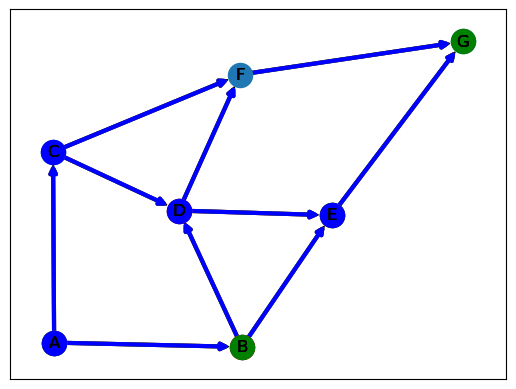

In [5]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def k_shortest_paths_with_population(graph, start_node, num_paths):
    paths = []
    
    # Create a priority queue to store paths and their associated costs
    queue = [(0, [start_node])]
    
    while queue and len(paths) < num_paths:
        _, current_path = heapq.heappop(queue)  # Get the path with the minimum cost
        
        current_node = current_path[-1]
        
        # Check if the current node is one of the destination nodes
        if len(current_path) == 4:
            paths.append(current_path)
        
        # Explore the neighbors of the current node
        for neighbor, edge_population in graph[current_node].items():
            new_path = current_path + [neighbor]  # Extend the current path
            
            # Calculate the new population by summing the populations along the path
            new_pop = sum(graph[u][v] for u, v in zip(new_path[:-1], new_path[1:]))
            
            # Push the new path into the priority queue with the new population as the cost
            heapq.heappush(queue, (new_pop, new_path))
    
    return paths


# Example usage
# Create a graph representation of the road network with associated population data
graph = {
    'A': {'B': 100, 'C': 200},
    'B': {'D': 150, 'E': 50},
    'C': {'D': 100, 'F': 300},
    'D': {'E': 100, 'F': 200},
    'E': {'G': 200},
    'F': {'G': 100},
    'G': {}
}

start_node = 'A'
num_paths = 3
paths_result = k_shortest_paths_with_population(graph, start_node, num_paths)

# Print the paths with their summed populations
for i, path in enumerate(paths_result):
    summed_pop = sum(graph[u][v] for u, v in zip(path[:-1], path[1:]))
    print(f"Path {i+1}: {path}, Summed Population: {summed_pop}")

# Create a networkx graph from the dictionary representation
nx_graph = nx.DiGraph(graph)

# Draw the graph with the paths highlighted
pos = nx.spring_layout(nx_graph)
nx.draw_networkx(nx_graph, pos, with_labels=True)
nx.draw_networkx(nx_graph, pos, nodelist=paths_result[0], node_color='r', edge_color='r', width=3, with_labels=True)
nx.draw_networkx(nx_graph, pos, nodelist=paths_result[1], node_color='g', edge_color='g', width=3, with_labels=True)
nx.draw_networkx(nx_graph, pos, nodelist=paths_result[2], node_color='b', edge_color='b', width=3, with_labels=True)
plt.show()
